<a href="https://colab.research.google.com/github/WoradeeKongthong/medical_cost_regression/blob/master/09_MedicalCost_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/WoradeeKongthong/medical_cost_regression/master/insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Note :  
- Dtypes are correct.
- There is no missing values.

See the distribution of the data

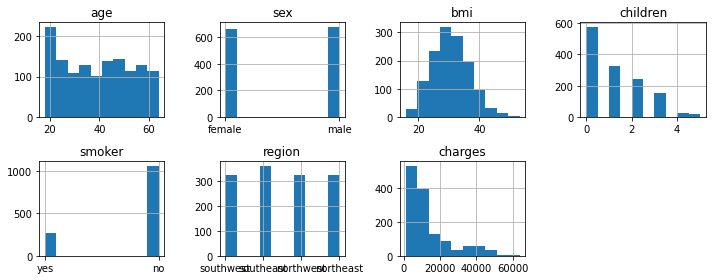

In [5]:
rows = 2
cols = 4
col = df.columns
index = 0

fig = plt.figure(figsize=(10,4))

for i in range(len(col)):
    fig.add_subplot(rows, cols, index+1)
    df[col[index]].hist()
    plt.title(col[index])
    index += 1
    if index == len(col) : 
      break

plt.tight_layout()

# Data Preprocessing

## X and y

In [0]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [7]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [8]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Encoding categorical data

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [0]:
# OneHotEncoder on 'sex', 'smoker' and 'region' columns'
ct = ColumnTransformer(transformers=[
                                     ('encoder', OneHotEncoder(drop='first'),['sex','smoker','region']),
                                     ('scaler', StandardScaler(),['bmi'])]
                       ,remainder='passthrough')
X = ct.fit_transform(X)

In [11]:
print('X shape : ',X.shape)
X[:5]

X shape :  (1338, 8)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        -0.45332   , 19.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.5096211 , 18.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.38330685, 28.        ,  3.        ],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -1.30553108, 33.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        -0.29255641, 32.        ,  0.        ]])

## Train-Test sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# ANN

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import keras

Using TensorFlow backend.


## Find the ANN Architecture.

### Simple ANN : one hidden layer

Training RMSE :  11365.355
Validation RMSE :  10991.0498046875


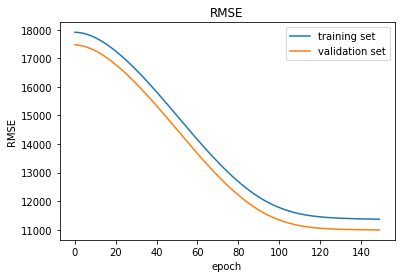

In [21]:
# create the ANN
regressor = Sequential()
regressor.add(Dense(units=8,kernel_initializer='normal',activation='relu',input_dim=8))
regressor.add(Dense(units=1,kernel_initializer='normal'))

# compile the ANN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])

# train the model with automatic varification dataset (training vs validation set)
history = regressor.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=150, verbose=0)

# function for showing the evaluation of the model
def evaluate_model(history):
  # print final metrics for training and validation sets
  print('Training RMSE : ', history.history['root_mean_squared_error'][-1])
  print('Validation RMSE : ', history.history['val_root_mean_squared_error'][-1])

  # plot the model evaluation
  plt.plot(history.history['root_mean_squared_error'])
  plt.plot(history.history['val_root_mean_squared_error'])
  plt.title('RMSE')
  plt.ylabel('RMSE')
  plt.xlabel('epoch')
  plt.legend(['training set', 'validation set'], loc='upper right')
  plt.show()

evaluate_model(history)

### Try one hidden layer with a lot of neurons (wide)

Training RMSE :  11319.8125
Validation RMSE :  10957.1318359375


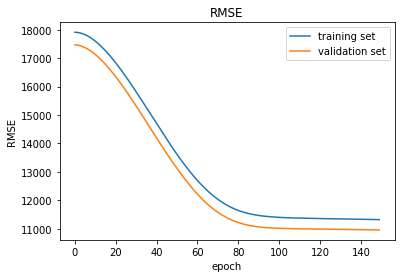

In [22]:
# create the ANN
regressor = Sequential()
regressor.add(Dense(units=16,kernel_initializer='normal',activation='relu',input_dim=8))
regressor.add(Dense(units=1,kernel_initializer='normal'))

# compile the ANN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])

# train the model with automatic varification dataset (training vs validation set)
history = regressor.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=150, verbose=0)
evaluate_model(history)

Note :  
It's performance is not different from the simple one.  
But it converges a little faster.

### Try a deep network with few neurons per layer (deep).

Training RMSE :  10980.76
Validation RMSE :  10684.431640625


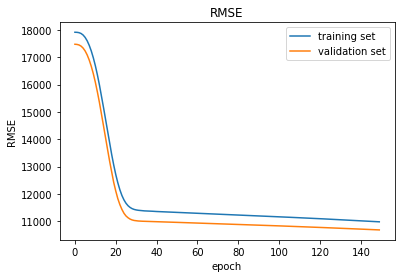

In [23]:
# create the ANN
regressor = Sequential()
regressor.add(Dense(units=8,kernel_initializer='normal',activation='relu',input_dim=8))
regressor.add(Dense(units=5,kernel_initializer='normal',activation='relu'))
regressor.add(Dense(units=1,kernel_initializer='normal'))

# compile the ANN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])

# train the model with automatic varification dataset (training vs validation set)
history = regressor.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=150, verbose=0)
evaluate_model(history)

Note :  
The deeper model converges faster.

### Try wide and deep hidden layers.

Training RMSE :  5325.273
Validation RMSE :  5961.8134765625


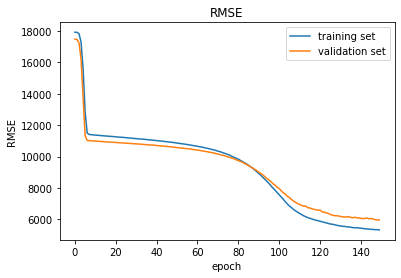

In [25]:
# create the ANN
regressor = Sequential()
regressor.add(Dense(units=16,kernel_initializer='normal',activation='relu',input_dim=8))
regressor.add(Dense(units=12,kernel_initializer='normal',activation='relu'))
regressor.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
regressor.add(Dense(units=4,kernel_initializer='normal',activation='relu'))
regressor.add(Dense(units=1,kernel_initializer='normal'))

# compile the ANN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])

# train the model with automatic varification dataset (training vs validation set)
history = regressor.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=150, verbose=0)
evaluate_model(history)

Note :  
Wider and deeper model can find the other minimun.

## Hyperparameter tuning with GridSearchCV
Now I realized that using a wider and deeper model is helpful.  
Let's tune the hyperparameters on this ANN, kernel_initializer and optimizer in this case.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor

In [126]:
# function for creating a model
def create_model(kernel_initializer='normal', optimizer='adam'):
  # create model architecture
  regressor = Sequential()
  regressor.add(Dense(units=16,kernel_initializer=kernel_initializer,activation='relu',input_dim=8))
  regressor.add(Dense(units=12,kernel_initializer=kernel_initializer,activation='relu'))
  regressor.add(Dense(units=8,kernel_initializer=kernel_initializer,activation='relu'))
  regressor.add(Dense(units=4,kernel_initializer=kernel_initializer,activation='relu'))
  regressor.add(Dense(units=1,kernel_initializer=kernel_initializer))

  # compile the ANN
  regressor.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])
  return regressor

# create model object
regressor = KerasRegressor(build_fn=create_model, batch_size=10, epochs=150, verbose=0)

# create parameter grid
kernel_initializer = ['uniform', 'normal']

param_grid = dict(kernel_initializer=kernel_initializer)
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, n_jobs=-1, cv=5, scoring='neg_root_mean_squared_error')
grid_result = grid.fit(X_train,y_train)

# grid search results
print("Best score : {} using {}" .format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean : {}, std : {}, param : {}".format(mean, stdev, param))

Best score : -5344.5894686437605 using {'kernel_initializer': 'normal'}
mean : -10494.836076070193, std : 6039.716014809614, param : {'kernel_initializer': 'uniform'}
mean : -5344.5894686437605, std : 297.5443167617611, param : {'kernel_initializer': 'normal'}


## Final model
The model with wide and deep hidden layers.  
kernel_initializer = 'normal'


Training RMSE :  5536.6577
Validation RMSE :  6230.29541015625


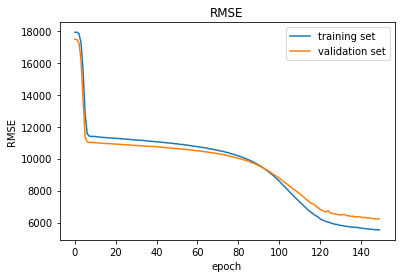

In [31]:
# function for creating a model
def create_model(kernel_initializer='normal'):
  # create model architecture
  regressor = Sequential()
  regressor.add(Dense(units=16,kernel_initializer=kernel_initializer,activation='relu',input_dim=8))
  regressor.add(Dense(units=12,kernel_initializer=kernel_initializer,activation='relu'))
  regressor.add(Dense(units=8,kernel_initializer=kernel_initializer,activation='relu'))
  regressor.add(Dense(units=4,kernel_initializer=kernel_initializer,activation='relu'))
  regressor.add(Dense(units=1,kernel_initializer=kernel_initializer))
  # compile the ANN
  regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])
  return regressor

regressor = KerasRegressor(build_fn=create_model)
history = regressor.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=150, verbose=0)
evaluate_model(history)

### Try more epochs

Training RMSE :  4705.1157
Validation RMSE :  5316.4189453125


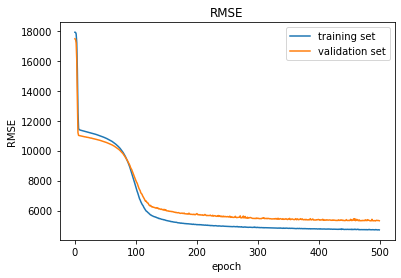

In [33]:
history = regressor.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=500, verbose=0)
evaluate_model(history)

# Prediction on Test set

In [0]:
y_pred = regressor.predict(X_test)

Print sample of predictions

In [37]:
np.set_printoptions(precision=2)
print('y_test     y_pred')
print(np.concatenate((np.array(y_test).reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),axis=1)[:10])

y_test     y_pred
[[ 3578.    4174.68]
 [21677.28 23390.45]
 [ 6360.99  8787.83]
 [63770.43 58598.85]
 [ 3392.37  4315.32]
 [ 2690.11  3243.81]
 [18608.26 19340.29]
 [12815.44 14179.04]
 [ 8515.76 10595.39]
 [11454.02 12431.52]]


Evaluation

In [0]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [46]:
# Training set evaluation
mse = mean_squared_error(y_train, regressor.predict(X_train))
rmse = sqrt(mse)
print ('Training set \tMSE : {}\tRMSE : {}'.format(mse,rmse))

mse = mean_squared_error(y_test, regressor.predict(X_test))
rmse = sqrt(mse)
print ('Test set \tMSE : {}\tRMSE : {}'.format(mse,rmse))

Training set 	MSE : 23242767.55956975	RMSE : 4821.075353027553
Test set 	MSE : 24299513.69989178	RMSE : 4929.45369182953


Note :  
The model is not overfitting.  
*** If there is an overfitting, we need to add the dropout layer into our ANN.